# 1 Workflow to integrate the Athal2 & Athal3 (infected) quantification files

#### Dataset2: Infected - Arabidopsis (Col-0)

Cynthia Soto <br>
Fecha: 28 de Octubre 2020<br>
Ultima md: 3 de Febrero 2020 <br>
Datatype representation: expression levels CDS (gene_name) <br>
Data quantify with HTSeq (alignments done with STAR SA) <br>

***Case:*** <br>
Data estimation by HTSeq are absolute values. 
Data are transformed to Log2 plus 1 to avoid arithmetic errors.

***Workflow:***<br>
1) Explore data & get the correct format (remove or add headers; remove not informative data, etc.)<br>
2) Get basic statics & counts in zeros.<br>
3) Transform absolute counts into Log2 counts. <br>
4) Get basic statics onto Log2 values. <br>
5) Create log2 files & statistics files in cvs format for further analysis. <br>

In [1]:
import pandas as pd
import numpy as np
import os 
import glob

In [2]:
try:
    # Change the current working Directory to the quantification dir
    #os.chdir("/home/cyntsc/Proyectos/athal1_htseq-counts/")
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal3_htseq-counts


In [3]:
#print(os.listdir(os.getcwd()) # list files in Dir
os.listdir(os.getcwd())

['SRR6283147',
 'SRR3383696',
 'my_statistics_HTSeq_counts.txt',
 'SRR364398',
 'SRR364391',
 'SRR364389',
 'SRR364390',
 'SRR6283146',
 'SRR364392',
 'SRR3383697',
 'SRR10586399',
 'SRR3383779',
 'SRR364399',
 'SRR364400',
 'SRR3383780',
 'SRR10586397',
 'SRR6283148',
 'SRR364401']

In [4]:
#for file in glob.glob("SRR*"):
#    print(file)

SRR6283147
SRR3383696
SRR364398
SRR364391
SRR364389
SRR364390
SRR6283146
SRR364392
SRR3383697
SRR10586399
SRR3383779
SRR364399
SRR364400
SRR3383780
SRR10586397
SRR6283148
SRR364401


### Here, are created two relevant data files:
<ol>
<li>The log2 transformated values: *_Log2.csv </li>
<li>The basic stats about each sample: *_stats.csv</li>
</ol>

In [5]:
## TRANSFORM values from absolute to log2+1
## 1) Take in account that rows with statistic (last ones) produced by the quantification tool in each file will be removed to avoid error
## this need to be adjust depending the quantification tool.

## 2) It is assumed that files contains just "Genes and Counts"

for file in glob.glob("SRR*"):
    print(file)
    df= pd.read_csv(file, sep='\t', header=None)
    # Add column-names
    try:
        df.columns = ["Genes","Counts"]
        #print(df.head(3))      #print(df.shape)            #print(df.tail(5))
        df.drop(df.tail(5).index,inplace=True) # drop last n rows (refering statistics of HTSeq)
        #print(df.tail(5))
        ## Plus 1 to avoid arithmetical error in Log2 transformation (avoid error div/0)
        df["Counts"] += 1
        ## Apply Log2 numpy function to absolute values and add a column
        df['log2_value'] = np.log2(df['Counts'])
        #print(df.head(3))
        ## CREATE NEW file_Log2.csv
        #df.to_csv(str(file)+'_Log2.csv', sep='\t', index=True)
        
        ## check zero values across genes based on abs.val and log2.val to add to the basic stats df
        genes_in_cero = df.isin([0]).sum()
        #print(genes_in_cero)
        ## CREATE NEW file with basic statistics *_stats.csv
        df_stats=df.describe()
        #print(df_stats.columns)
        df_stats.loc['Zeros'] = [genes_in_cero['Counts'],genes_in_cero['log2_value']]      # adding a row
        df_stats.loc['sample'] = [file, file]                                              # adding a row
        print(df_stats)            # print(df_stats.columns)
        df_stats.to_csv('../results-data/'+str(file)+'_infected_stats.csv', sep='\t')
    except:
        pass # doing nothing on exception, not processed because it is already pre-processed"

SRR6283147
       Genes  Counts  log2_value
0  AT1G01010      49    5.614710
1  AT1G01020      41    5.357552
2  AT1G01030      34    5.087463
SRR3383696
       Genes  Counts  log2_value
0  AT1G01010      93    6.539159
1  AT1G01020     142    7.149747
2  AT1G01030       7    2.807355
SRR364398
       Genes  Counts  log2_value
0  AT1G01010     123    6.942515
1  AT1G01020     124    6.954196
2  AT1G01030      11    3.459432
SRR364391
       Genes  Counts  log2_value
0  AT1G01010     148    7.209453
1  AT1G01020     185    7.531381
2  AT1G01030      11    3.459432
SRR364389
       Genes  Counts  log2_value
0  AT1G01010     126    6.977280
1  AT1G01020     161    7.330917
2  AT1G01030       9    3.169925
SRR364390
       Genes  Counts  log2_value
0  AT1G01010     125    6.965784
1  AT1G01020     177    7.467606
2  AT1G01030       9    3.169925
SRR6283146
       Genes  Counts  log2_value
0  AT1G01010      55    5.781360
1  AT1G01020      39    5.285402
2  AT1G01030      42    5.392317
SRR

### Here all stats files are integrated in one file to plot it
Important note: when re-running this piece of code be sure to erase the **allsample_stats.csv** file from your work directory before running again

In [8]:
#for file in glob.glob("../results-data/*infected_stats.csv"):
#    print(file)

../results-data/SRR364401_infected_stats.csv
../results-data/SRR6283146_infected_stats.csv
../results-data/SRR364399_infected_stats.csv
../results-data/SRR3383779_infected_stats.csv
../results-data/SRR6283147_infected_stats.csv
../results-data/SRR10586399_infected_stats.csv
../results-data/SRR364391_infected_stats.csv
../results-data/SRR3383697_infected_stats.csv
../results-data/SRR364400_infected_stats.csv
../results-data/SRR364392_infected_stats.csv
../results-data/SRR364398_infected_stats.csv
../results-data/SRR3383780_infected_stats.csv
../results-data/SRR364390_infected_stats.csv
../results-data/SRR10586397_infected_stats.csv
../results-data/SRR6283148_infected_stats.csv
../results-data/SRR364389_infected_stats.csv
../results-data/SRR3383696_infected_stats.csv


In [18]:
bfirst_file=True
for file in glob.glob("../results-data/*infected_stats.csv"):
    print(file)
    df_tmp=pd.read_csv(file, sep='\t', header=None, index_col=False)
    print(df_tmp)
    df = df_tmp.T
    df.drop(df.index[:1], inplace=True)
    # drop index 0 (somelike headers) -- rows
    if bfirst_file==True:
        df_all=df
        bfirst_file=False
        #print(df_all)
    else:
        df_all=df_all.append(df)
        #print(df_all)
        pass
    
print(df_all)
df_all.to_csv('../results-data/all_infected_stats.csv', sep='\t', header=None, index=None)

../results-data/SRR364401_infected_stats.csv
         0                   1                   2
0      NaN              Counts          log2_value
1    count             27655.0             27655.0
2     mean   297.1967817754475   4.817807281308823
3      std  1212.2919290194102  3.6928738832030867
4      min                 1.0                 0.0
5      25%                 1.0                 0.0
6      50%                44.0   5.459431618637297
7      75%               239.0   7.900866807980749
8      max             73959.0  16.174438097736743
9    Zeros                 0.0              7011.0
10  sample           SRR364401           SRR364401
../results-data/SRR6283146_infected_stats.csv
         0                   1                   2
0      NaN              Counts          log2_value
1    count             27655.0             27655.0
2     mean  261.05659012836736   3.522137526964945
3      std  1865.0059964800778  3.5097878902634854
4      min                 1.0            

In [19]:
#set columns to apply filters by name
df_all.columns = ['Metric','count','mean','std','min','25%','50%','75%','max','Zeros','sample']

In [20]:
## Filter data for plotting the log2 statistics
is_log2=df_all['Metric']=='log2_value'
df_plot=df_all[is_log2] 
#df_plot.set_index('sample', inplace=True)
print(df_plot.index)
df_plot

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype='int64')


,Metric,count,mean,std,min,25%,50%,75%,max,Zeros,sample
2,log2_value,27655.0,4.817807281308823,3.6928738832030867,0.0,0.0,5.459431618637297,7.900866807980749,16.174438097736743,7011.0,SRR364401
2,log2_value,27655.0,3.522137526964945,3.5097878902634854,0.0,0.0,2.807354922057604,6.339850002884624,16.806058671742843,9657.0,SRR6283146
2,log2_value,27655.0,4.75029461089433,3.709542434517706,0.0,0.0,5.285402218862249,7.8548650182718145,16.122180901259753,7090.0,SRR364399
2,log2_value,27655.0,4.723590676826614,3.7481006476496654,0.0,0.0,5.426264754702098,7.900866807980749,17.30761885400159,7719.0,SRR3383779
2,log2_value,27655.0,3.122717909444594,3.3710681453069475,0.0,0.0,2.0,5.672425341971495,16.79607764338467,10600.0,SRR6283147
2,log2_value,27655.0,5.807581742515993,3.984069684187342,0.0,1.584962500721156,6.700439718141092,9.060695931687555,17.605956903531055,5703.0,SRR10586399
2,log2_value,27655.0,5.014577062192591,3.805382319059212,0.0,0.0,5.906890595608519,8.228818690495881,16.77200521506105,7185.0,SRR364391
2,log2_value,27655.0,5.183563929907964,3.985064887029906,0.0,0.0,6.108524456778169,8.554588851677638,17.972749860653227,7375.0,SRR3383697
2,log2_value,27655.0,4.814032575163637,3.6948319831634806,0.0,0.0,5.459431618637297,7.8917805061031014,16.168946279344013,7053.0,SRR364400
2,log2_value,27655.0,5.002743681828572,3.7997511862574758,0.0,0.0,5.882643049361842,8.214319120800766,16.747760290778356,7219.0,SRR364392


**Selection of metrics to be plotted and type conversions**

In [21]:
df_plot.dtypes
# select and format fields to be plotted
df_plot[['mean','std','25%','50%','75%','max','Zeros']] = df_plot[['mean','std','25%','50%','75%','max','Zeros']].apply(pd.to_numeric)
print(df_plot.dtypes)
df_plot=df_plot.filter(['sample','mean','std','25%','50%','75%','max','Zeros']).round(decimals=3)
df_plot

Metric     object
count      object
mean      float64
std       float64
min        object
25%       float64
50%       float64
75%       float64
max       float64
Zeros     float64
sample     object
dtype: object


/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,sample,mean,std,25%,50%,75%,max,Zeros
2,SRR364401,4.818,3.693,0.000,5.459,7.901,16.174,7011.0
2,SRR6283146,3.522,3.510,0.000,2.807,6.340,16.806,9657.0
2,SRR364399,4.750,3.710,0.000,5.285,7.855,16.122,7090.0
2,SRR3383779,4.724,3.748,0.000,5.426,7.901,17.308,7719.0
2,SRR6283147,3.123,3.371,0.000,2.000,5.672,16.796,10600.0
2,SRR10586399,5.808,3.984,1.585,6.700,9.061,17.606,5703.0
2,SRR364391,5.015,3.805,0.000,5.907,8.229,16.772,7185.0
2,SRR3383697,5.184,3.985,0.000,6.109,8.555,17.973,7375.0
2,SRR364400,4.814,3.695,0.000,5.459,7.892,16.169,7053.0
2,SRR364392,5.003,3.800,0.000,5.883,8.214,16.748,7219.0



###  Adding labels for plotting (leyends)


In [22]:
file='../meta-data/ID_samples.csv'
lst_header=["sample","huesped","condicion","fungus","ID"] 
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
print(df_meta.index)
print(df_meta)
#df_meta.loc['SRR3383696']

RangeIndex(start=0, stop=25, step=1)
         sample         ID
0     SRR364389       Ch22
1     SRR364400       Ch40
2     SRR364401       Ch40
3     SRR364390       Ch22
4     SRR364391       Ch22
5     SRR364392       Ch22
6     SRR364398       Ch40
7     SRR364399       Ch40
8    SRR3383696       Bc12
9    SRR3383697       Bc12
10   SRR3383779       Bc18
11   SRR3383780       Bc18
12  SRR10586397       Bc24
13  SRR10586399       Bc24
14   SRR6283146       Ss30
15   SRR6283147       Ss30
16   SRR6283148       Ss30
17   SRR3383640  healthy12
18   SRR3383641  healthy12
19   SRR3383782  healthy18
20   SRR3383783  healthy18
21   SRR3383821  healthy24
22   SRR3383822  healthy24
23   SRR6283144  healthy30
24   SRR6283145  healthy30


### Join data-stats with meta-data labels

In [23]:
merged_df=df_plot.merge(df_meta, how="left")
merged_df=merged_df.sort_values('ID')
merged_df

,sample,mean,std,25%,50%,75%,max,Zeros,ID
16,SRR3383696,5.009,3.883,0.000,5.858,8.304,17.585,7518.0,Bc12
7,SRR3383697,5.184,3.985,0.000,6.109,8.555,17.973,7375.0,Bc12
3,SRR3383779,4.724,3.748,0.000,5.426,7.901,17.308,7719.0,Bc18
11,SRR3383780,5.013,3.933,0.000,5.807,8.392,17.338,7549.0,Bc18
13,SRR10586397,5.862,3.990,1.585,6.794,9.109,17.465,5627.0,Bc24
5,SRR10586399,5.808,3.984,1.585,6.700,9.061,17.606,5703.0,Bc24
12,SRR364390,4.961,3.791,0.000,5.781,8.167,17.189,7229.0,Ch22
6,SRR364391,5.015,3.805,0.000,5.907,8.229,16.772,7185.0,Ch22
15,SRR364389,4.978,3.796,0.000,5.807,8.187,17.208,7164.0,Ch22
9,SRR364392,5.003,3.800,0.000,5.883,8.214,16.748,7219.0,Ch22


### Get and sort specific column of interest 

In [73]:
## Ex: zeros field 
df_tmp= merged_df.sort_values('ID')
#df_tmp
col_ceros = df_tmp['Zeros'].tolist()
col_ceros.sort(reverse=False)
print(col_ceros)
#newlst

[5627.0, 5703.0, 7011.0, 7053.0, 7090.0, 7117.0, 7164.0, 7185.0, 7219.0, 7229.0, 7375.0, 7518.0, 7549.0, 7719.0, 9657.0, 10600.0, 10866.0]


### Plot quantification metrics 

In [41]:
import matplotlib.pyplot as plt
## if you wish to consult available styles
plt.style.available[:30]    
# 'Solarize_Light2','_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale',  'seaborn'

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [56]:
plt.style.use('seaborn-white')    # classic
# kind : str

#         ‘line’ : line plot (default)
#         ‘bar’ : vertical bar plot
#         ‘barh’ : horizontal bar plot
#         ‘hist’ : histogram
#         ‘box’ : boxplot
#         ‘kde’ : Kernel Density Estimation plot
#         ‘density’ : same as ‘kde’
#         ‘area’ : area plot
#         ‘pie’ : pie plot
#         ‘scatter’ : scatter plot
#         ‘hexbin’ : hexbin plot

<AxesSubplot:>

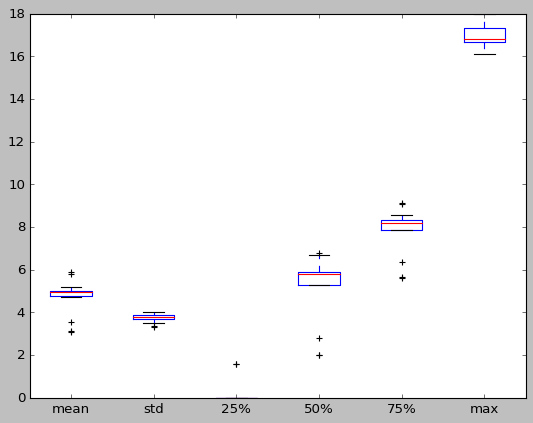

In [49]:
merged_df.plot(x='ID', y=['mean','std','25%','50%','75%','max'], kind='box') 
#merged_df.plot(x='ID', y=['mean','std','25%','50%','75%','max'], kind='bar')

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


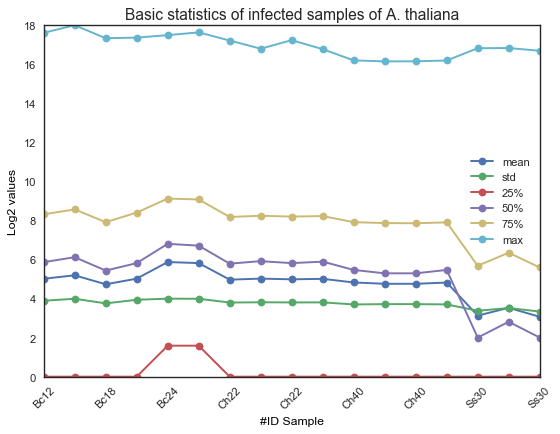

<Figure size 640x440 with 0 Axes>

In [71]:
## be careful to assure your metrics can be plotted in the same dimensions
## Ex: zero field is out of range respecting the other measures
merged_df.plot(x='ID', y=['mean','std','25%','50%','75%','max'], kind='line',marker='o')   #marker='o'
plt.xlabel('#ID Sample',color='black')
plt.xticks(rotation=45)
plt.ylabel('Log2 values',color='black')
plt.title('Basic statistics of infected samples of A. thaliana', fontsize=14)
plt.legend(loc=0)
plt.show()
plt.savefig("../results-data/athal_infected_basic_stats.png")

### Plot of genes with cero count by sample
To plot the lines in the chart (ceros across samples) you first need to merge samples <br>
If you want to try jump to notebook **3_merge_dataframes_infected** to get the cero counts information

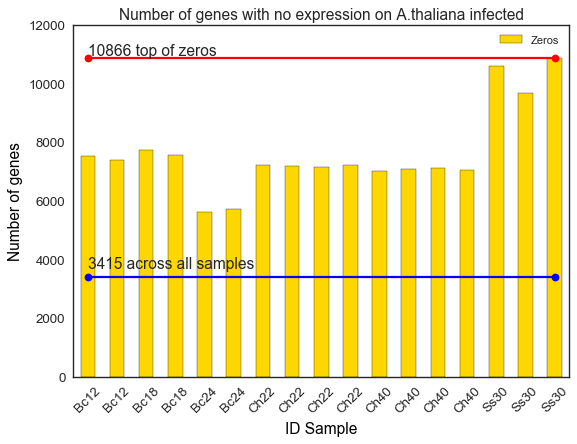

<Figure size 640x440 with 0 Axes>

In [84]:
# More plots
merged_df.plot(x='ID', y='Zeros', kind='bar', color='gold',fontsize=12)
plt.xlabel('ID Sample',color='black',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of genes',color='black',fontsize=14)
plt.title('Number of genes with no expression on A.thaliana infected', fontsize=14)
plt.legend(loc=1)

## add arbitrary lines to canvas
plt.plot([0, 16], [10866, 10866], 'k-', lw=2, color='red',marker = 'o')
plt.plot([0, 16], [3415, 3415], 'k-', lw=2, color='blue',marker = 'o')
plt.text(0, 10966, "10866 top of zeros", fontsize=14)
plt.text(0, 3718, "3415 across all samples", fontsize=14)

plt.show()
plt.savefig("../plots/all_infected_num_zeros.png")